In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

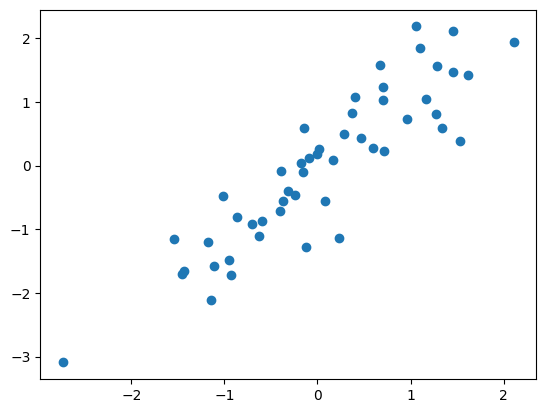

In [36]:
# Write a function that creates the data and outputs x and y
#y = m*x + randn/2
def create_data(m):
  N = 50
  m = 1
  x = torch.randn(N, 1)
  y = m * x + torch.randn(N, 1)/2

  return x, y

x, y = create_data(m = 0.1)
plt.scatter(x, y)
plt.show()

In [34]:
# Write a function that builds and trains the model
def build_train_model(x, y):
  # Build the model
  model = nn.Sequential(
      nn.Linear(in_features = 1, out_features = 1),
      nn.ReLU(),
      nn.Linear(in_features = 1, out_features = 1)
  )

  # Setup loss and optimizer
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(),
                              lr = 0.05)

  # Train the model
  num_epochs = 500
  losses = torch.zeros(num_epochs)

  for epochi in range(num_epochs):

    # Forward pass
    y_hat = model(x)

    # Calculate the loss
    loss = lossfun(y_hat, y)
    losses[epochi] = loss

    # Backward prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = model(x)

  return predictions, losses

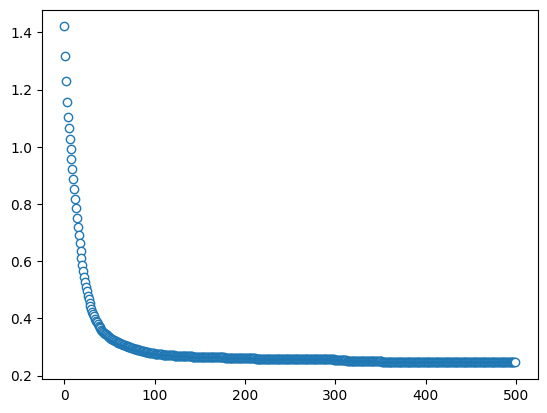

In [51]:
# test the model
x, y = create_data(0.8)

yhat, losses = build_train_model(x, y)

plt.plot(losses.detach(), 'o', markerfacecolor ='w', linewidth = .1)


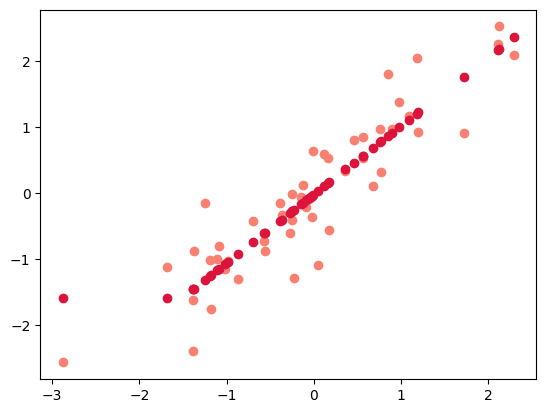

In [53]:

plt.scatter(x, y, c = 'salmon')
plt.scatter(x, yhat.detach(), c = 'crimson')